# Multiple Linear Regression

y = b0 + b1x1 + b2x2 + ... + bnXn


Aditional 

- [Apply Multiple Lineal Regresion abd Arificial Network Model for Potato Cultivars](https://www.mdpi.com/2073-4395/11/5/885)

## Anscombe's Quartet

Anscombe's Quartet is a collection of four datasets created by statistician Francis Anscombe in 1973. Each dataset has nearly identical simple statistical properties:

Similar means for x and y.

Similar variances.

Similar correlation coefficients.

Almost identical linear regression lines.

However, when you plot the datasets, they look very different from each other — showing patterns like clusters, curves, or outliers.

The main lesson from Anscombe's Quartet is:
Always visualize your data, not just rely on statistical summaries.
Simple statistics can be misleading without graphical analysis.

![Texto alternativo](../../images/assumptionOfLinearRegresion.png)

La regresión lineal es un método estadístico poderoso, pero para que sus resultados sean válidos y confiables, deben cumplirse ciertos supuestos:

1. Linealidad
Teoría: La relación entre las variables independientes (X) y la variable dependiente (Y) debe ser lineal. Si no lo es, el modelo no capturará adecuadamente los patrones en los datos.

2. Homocedasticidad
Teoría: La varianza de los errores debe ser constante a lo largo de todos los niveles de las variables independientes. Si la varianza cambia (heterocedasticidad), las estimaciones de significancia estadística pueden ser incorrectas.

3. Normalidad Multivariante
Teoría: Los errores/residuos deben seguir una distribución normal. Esto es especialmente importante para intervalos de confianza y pruebas de hipótesis.

4. Independencia
Teoría: Las observaciones deben ser independientes entre sí (no autocorrelacionadas). Esto es crucial en datos de series temporales donde los valores suelen estar correlacionados con sus valores pasados.

5. Ausencia de Multicolinealidad
Teoría: Las variables independientes no deben estar altamente correlacionadas entre sí. La multicolinealidad hace difícil determinar el efecto individual de cada variable.

6. Detección de Outliers (Extra)
Teoría: Aunque no es un supuesto estricto, los valores atípicos pueden tener un impacto desproporcionado en el modelo, distorsionando los resultados.

References:

[assumptions-of-linear-regression](https://www.superdatascience.com/blogs/assumptions-of-linear-regression)

=== DESCRIPCIÓN DEL DATASET ===
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measur...


=== 1. LINEALIDAD ===


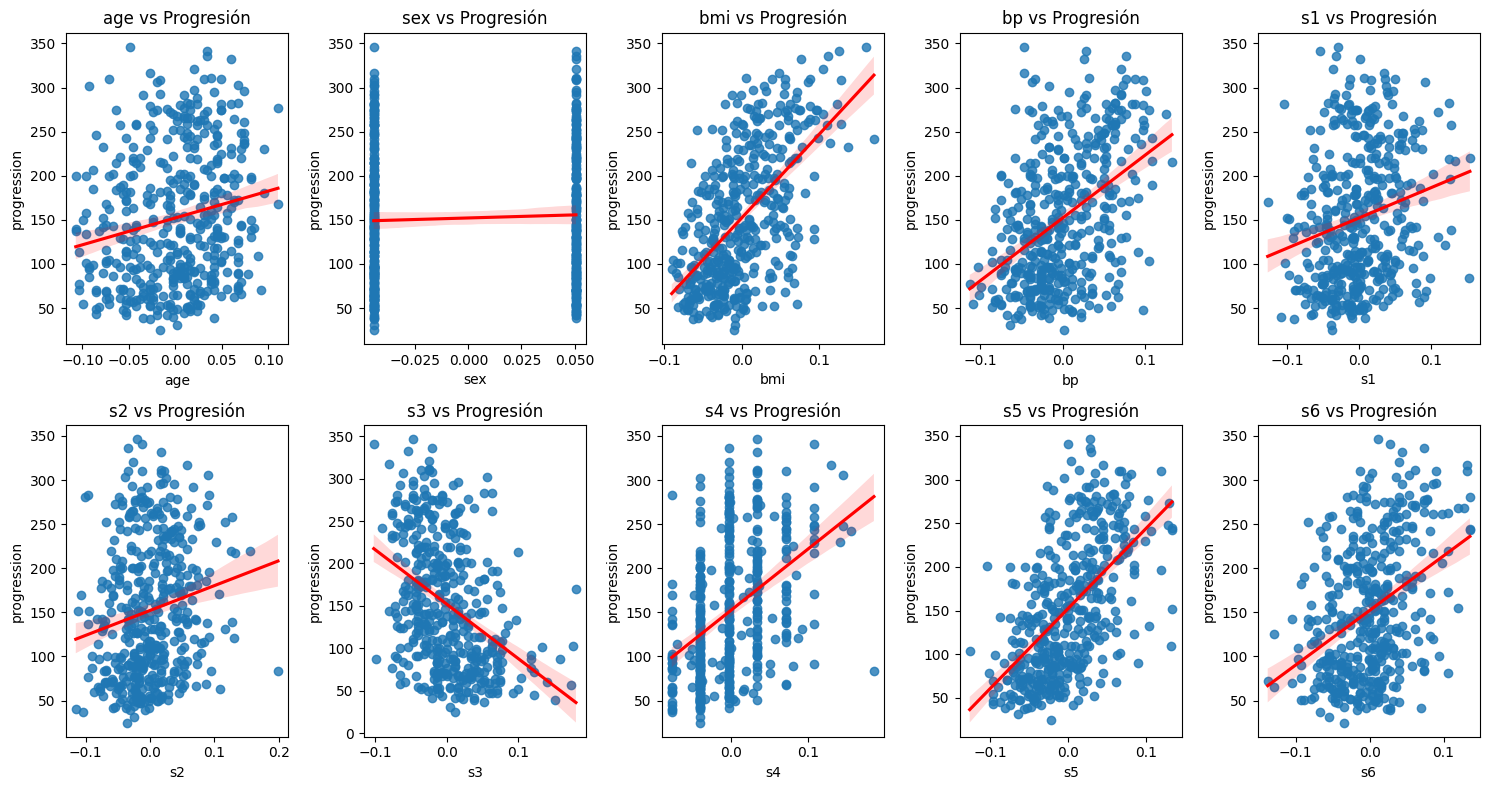


Evaluación:
- Se observa visualmente si existe relación lineal entre cada predictor y la variable respuesta
- Variables como 'bmi' y 's5' muestran tendencias lineales claras
- Algunas variables como 'sex' muestran poca relación lineal


=== 2. MODELO DE REGRESIÓN ===
                            OLS Regression Results                            
Dep. Variable:            progression   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           3.83e-62
Time:                        21:36:23   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:    

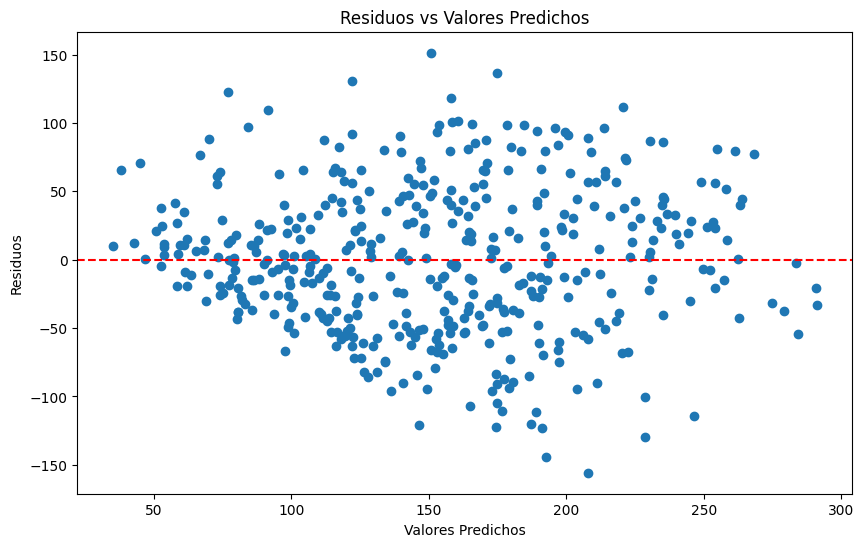


Prueba Breusch-Pagan - p-valor: 0.0035

Evaluación:
- NO se cumple el supuesto (p ≤ 0.05). Existe heterocedasticidad
- Solución posible: Transformar variables o usar modelos robustos


=== 4. NORMALIDAD DE RESIDUOS ===


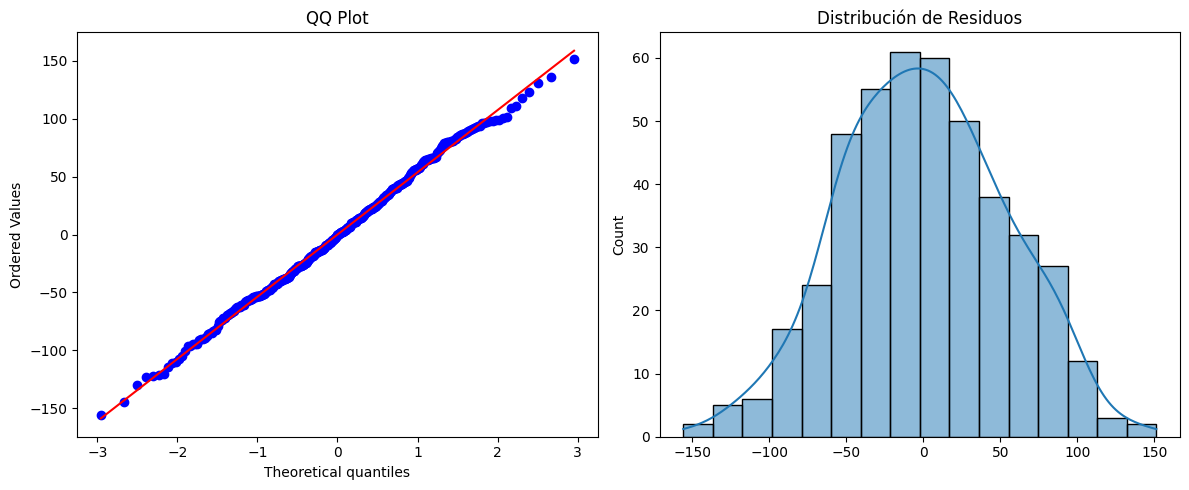


Prueba Shapiro-Wilk - Estadístico: 0.9971, p-valor: 0.6162

Evaluación:
- Se cumple el supuesto (p > 0.05). Los residuos siguen distribución normal


=== 5. INDEPENDENCIA DE RESIDUOS ===
Estadístico Durbin-Watson: 2.0285

Evaluación:
- Se cumple el supuesto. No hay autocorrelación significativa


=== 6. MULTICOLINEALIDAD ===
   Variable        VIF
0     const   1.000000
1       age   1.217307
2       sex   1.278071
3       bmi   1.509437
4        bp   1.459428
5        s1  59.202510
6        s2  39.193370
7        s3  15.402156
8        s4   8.890986
9        s5  10.075967
10       s6   1.484623

Evaluación:
- Variables con posible multicolinealidad (VIF > 5):
  Variable        VIF
5       s1  59.202510
6       s2  39.193370
7       s3  15.402156
8       s4   8.890986
9       s5  10.075967
- Solución posible: Eliminar variables correlacionadas o usar PCA


=== 7. DETECCIÓN DE OUTLIERS ===


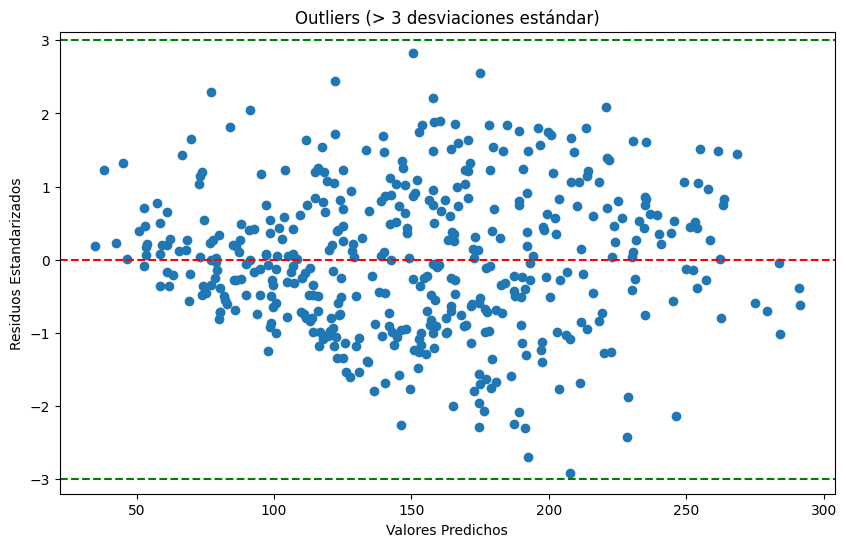


Outliers detectados: 0 (0.00%)

Evaluación:
- No se detectaron outliers significativos

=== RESUMEN FINAL DE SUPUESTOS ===
1. Linealidad: Parcialmente cumplida (revisar relaciones individuales)
2. Homocedasticidad: No cumplida
3. Normalidad residuos: Cumplida
4. Independencia residuos: Cumplida
5. Multicolinealidad: Presente
6. Outliers: Pocos


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# 1. Cargar y preparar los datos
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['progression'] = diabetes.target

print("=== DESCRIPCIÓN DEL DATASET ===")
print(diabetes.DESCR[:500] + "...")  # Mostrar solo parte de la descripción

# 2. Análisis de supuestos de regresión lineal

# A. Linealidad
print("\n\n=== 1. LINEALIDAD ===")
plt.figure(figsize=(15, 8))
for i, col in enumerate(diabetes.feature_names):
    plt.subplot(2, 5, i+1)
    sns.regplot(x=df[col], y=df['progression'], line_kws={'color': 'red'})
    plt.title(f"{col} vs Progresión")
plt.tight_layout()
plt.show()

print("\nEvaluación:")
print("- Se observa visualmente si existe relación lineal entre cada predictor y la variable respuesta")
print("- Variables como 'bmi' y 's5' muestran tendencias lineales claras")
print("- Algunas variables como 'sex' muestran poca relación lineal")

# B. Modelo de regresión
print("\n\n=== 2. MODELO DE REGRESIÓN ===")
X = sm.add_constant(df.drop('progression', axis=1))
y = df['progression']
model = sm.OLS(y, X).fit()
print(model.summary())

# C. Homocedasticidad
print("\n\n=== 3. HOMOCEDASTICIDAD ===")
predicted = model.predict(X)
residuals = y - predicted

plt.figure(figsize=(10, 6))
plt.scatter(predicted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos')
plt.show()

# Prueba Breusch-Pagan
_, pval, _, _ = sm.stats.diagnostic.het_breuschpagan(residuals, model.model.exog)
print(f"\nPrueba Breusch-Pagan - p-valor: {pval:.4f}")

print("\nEvaluación:")
if pval > 0.05:
    print("- Se cumple el supuesto (p > 0.05). Los residuos tienen varianza constante")
else:
    print("- NO se cumple el supuesto (p ≤ 0.05). Existe heterocedasticidad")
    print("- Solución posible: Transformar variables o usar modelos robustos")

# D. Normalidad de residuos
print("\n\n=== 4. NORMALIDAD DE RESIDUOS ===")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(residuals, plot=plt)
plt.title('QQ Plot')

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribución de Residuos')

plt.tight_layout()
plt.show()

# Prueba Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)
print(f"\nPrueba Shapiro-Wilk - Estadístico: {shapiro_test[0]:.4f}, p-valor: {shapiro_test[1]:.4f}")

print("\nEvaluación:")
if shapiro_test[1] > 0.05:
    print("- Se cumple el supuesto (p > 0.05). Los residuos siguen distribución normal")
else:
    print("- NO se cumple el supuesto (p ≤ 0.05). Los residuos no son normales")
    print("- Solución posible: Transformación de variables o métodos no paramétricos")

# E. Independencia (Autocorrelación)
print("\n\n=== 5. INDEPENDENCIA DE RESIDUOS ===")
durbin_watson = sm.stats.durbin_watson(residuals)
print(f"Estadístico Durbin-Watson: {durbin_watson:.4f}")

print("\nEvaluación:")
if 1.5 < durbin_watson < 2.5:
    print("- Se cumple el supuesto. No hay autocorrelación significativa")
else:
    print("- Posible autocorrelación. Valor fuera del rango ideal [1.5, 2.5]")
    print("- Solución posible: Modelos ARIMA o considerar estructura temporal")

# F. Multicolinealidad
print("\n\n=== 6. MULTICOLINEALIDAD ===")
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

print("\nEvaluación:")
high_vif = vif_data[vif_data['VIF'] > 5]
if len(high_vif) == 0:
    print("- No hay multicolinealidad problemática (VIF < 5 para todas las variables)")
else:
    print(f"- Variables con posible multicolinealidad (VIF > 5):")
    print(high_vif)
    print("- Solución posible: Eliminar variables correlacionadas o usar PCA")

# G. Outliers
print("\n\n=== 7. DETECCIÓN DE OUTLIERS ===")
std_residuals = residuals / np.std(residuals)
outliers = np.abs(std_residuals) > 3

plt.figure(figsize=(10, 6))
plt.scatter(predicted, std_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=3, color='g', linestyle='--')
plt.axhline(y=-3, color='g', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos Estandarizados')
plt.title('Outliers (> 3 desviaciones estándar)')
plt.show()

print(f"\nOutliers detectados: {outliers.sum()} ({outliers.mean()*100:.2f}%)")

print("\nEvaluación:")
if outliers.sum() == 0:
    print("- No se detectaron outliers significativos")
else:
    print("- Se detectaron posibles outliers que podrían afectar el modelo")
    print("- Solución posible: Investigar estos casos o usar métodos robustos")

print("\n=== RESUMEN FINAL DE SUPUESTOS ===")
print("1. Linealidad: Parcialmente cumplida (revisar relaciones individuales)")
print(f"2. Homocedasticidad: {'Cumplida' if pval > 0.05 else 'No cumplida'}")
print(f"3. Normalidad residuos: {'Cumplida' if shapiro_test[1] > 0.05 else 'No cumplida'}")
print(f"4. Independencia residuos: {'Cumplida' if 1.5 < durbin_watson < 2.5 else 'Revisar'}")
print(f"5. Multicolinealidad: {'Baja' if len(high_vif) == 0 else 'Presente'}")
print(f"6. Outliers: {'Pocos' if outliers.sum() < 5 else 'Numerosos'}")

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('../../datasets/model/50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

## Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
# Set the decimal precision for the output
# to 2 decimal places
np.set_printoptions(precision=2)

# reshape(len(y_pred), 1): reshapes y_pred to a 2D array with one column
# reshape(len(y_test), 1): reshapes y_test to a 2D array with one column
# np.concatenate: concatenates the two arrays along axis 1 (columns)
# Example output: 
# y_pred = [4.56, 2.78, 5.12]
# y_test = [5.00, 3.00, 5.00]

# After reshaping, and concatenating, the output will look like this:
# [[4.56, 5.00], [2.78, 3.00], [5.12, 5.00]]

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
